In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
##############################################



# Intially the proposed sigma method did not work so I created this instead to handle +/-
def sigma(z):
    # When dealing with numbers that are either too large or small
    # to help prevent overflow and for memory
    tempC = np.clip((-1 * z), -709.78, 709.78)
    s = 1.0 + np.exp(tempC)
    # Smaller numbers to stop Divide by zero
    if (s == 1.0):
        s = 1.0 + np.finfo(float).eps
    return (1.0 / s)

# Graph often got misconstrued with this formula
#def sigma(t):
#   return 1/(1 + np.exp(-t))


def model(x, par):
    # compute f (X , par )
    # see formula (1) in this pdf file
    iteration = 0
    par0 = par[0]
    for i in range(1, len(x)):
        iteration += (par[i] * x[i])
    f = sigma(iteration + par0) 
    return f

def dModel(x, par):
    df = np.zeros(len(par))
    # compute the gradient of f at x
    # see formula (11) in this pdf file
    # Gradient of sigma param
    par0 = par[0]
    fs = 0
    for n in range(1, len(x)):
        fs = fs +(par[n] * x[n])
    fs = fs+par0
    grads = sigma(fs) * (1-sigma(fs))
    # remove first item x0 and replace with 1 and list
    np.delete(x, 0)
    gradList = np.array([1])
    # add list
    x = np.concatenate((gradList, x))
    df = grads * x
    return df


def objective(par, data):
    ell = 0
    # compute the objective function
    # see formula (2) in this pdf file
    for x,y in data:
        f = model(x, par)
        # Broken down equation to handle expressions properly
        yf =  y*f
        sub = (1 - y) * (1 - f)
        k =np.log(yf + sub)
        ell = ell - k
    return ell

def gradient(par, data):
    grad = np.zeros(len(par))
    # Compute gradient for objective method
    # Algo 3 (formula 10)
    for n in range(1, len(data)):
        x = data[n][0]
        y = int(data[n][1])
        f = model(x, par)
        gradell = dModel(x, par)
        # Denominators of gradient equation
        g1 = (2.0 * y) - 1.0
        g2 = (y * f) + ((1.0 - y) * (1.0 - f))
        g = -1.0 *(g1/g2) * gradell

        grad = grad + g
    return grad

def train(par0, eta, T, data):
    # training , see Algorithm 1 in this pdf file
    # Make into list
    # Had quite a few problems here as it was passing a non list initially
    par = list(par0)
    obj = []
    for t in range(1, T):
        ellD = objective(par, data)
        ellgrad = gradient(par, data)
        # add objective to object(obj)
        obj.append(ellD)
        par = par - (eta * ellgrad)
    return par, obj

def ER(par, data):
    ER = 0
    # compute the error rate
    # see formula (5) in this pdf file
    for n in range(1, len(data)):
        # Get X and Y from data
        x = data[n][0]
        y = int(data[n][1])
        f = model(x, par)
    yhat = 1*(f) 
    #experiment = (y - yhat)**2
    ERR = [(y - yhat)**2 for n in range(len(x))]
    return ERR
    
   




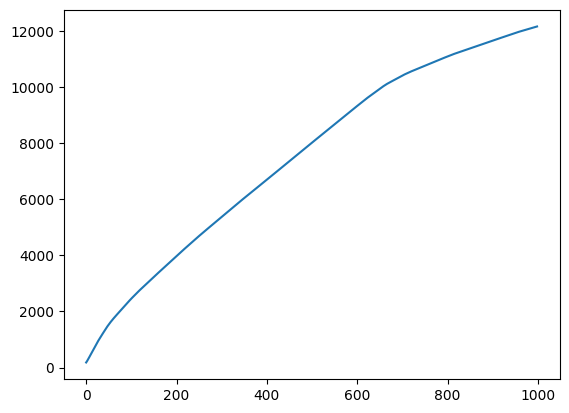

In [2]:
## Question 1 

# Param  set
d = 10
N = 100
eta = 0.01
T = 1000

# Generate a training data set
def generateData (d , N , noise =.01):
    X = [np.random.randn(d) for n in range(N)]
    lambdaTrue = np.cos(np.random.randn(d+1))
    Y = [((lambdaTrue[0] + lambdaTrue[1:] @ s) + noise * np.random.randn() > 0) for s in X]
    D = [[X[n], Y[n]] for n in range(N)]
    return D

# Set data 
data = generateData(d, N)

# Set par0
par0 = []
par0 = [np.power(-1, i) for i in range(d+1)]

par, obj = train(par0, eta, T, data) # train the model

plt.plot(obj) # plot the objective
plt.show()

Header check :  ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
estimating λ by minimizing through Tepochs gradient descent


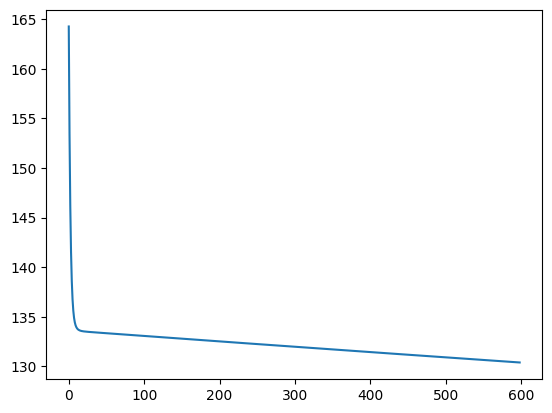

In [3]:
## Question 2

# Method to carry out normalisation
# Makes use of mean and standard deviation
def NormalizeData(x):
      Z = [(x[n] - np.mean(x))/np.std(x) for n in range(len(x))]
      return Z

# load file
file = "auto.txt"
data = pd.read_csv(file, sep='\t', header =0)

# Check the header
list_of_column = list(data.columns)
print('Header check : ',
      list_of_column)

# X[W/A/Y], Y[HIGH]
D = [[np.array([x[4], x[5], x[6]]), 1 * (x[0] >= 23)] for x in data.values]

# Normalising the entire data set
for i in range(len(D)):
      D[i][0] = NormalizeData(D[i][0])

# Reshuffle data and split into the training set and test set
reshuffle = np.random.choice(len(D), len(D), replace=False)
sizeData = int(len(D)/2)
Dtrain = [D[i] for i in reshuffle[:sizeData]]
Dtest = [D[i] for i in reshuffle[sizeData:]]

# Hyper parameters set i.e epochs, learning rate, init param
T = 600
eta = 0.01
d = 3

# Set par0
par0 = []
par0 = [np.power(-1, i) for i in range(d+1)]

#print(Dtrain)
par, obj = train(par0, eta, T, Dtrain) # train the model
print("estimating λ by minimizing through Tepochs gradient descent")
plt.plot(obj) # plot the objective
plt.show()


# Graph may not be perfect due to sigma explanation above

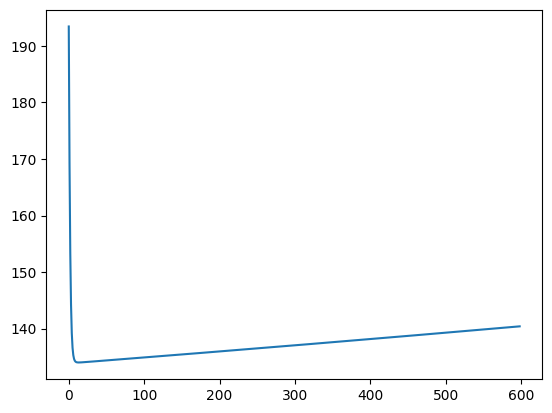

[0.2432814344500081,
 0.2432814344500081,
 0.2432814344500081,
 0.2432814344500081]

In [4]:
## Question 3

# Augmented dataset with variable time
augmentD = [[np.array([x[4], x[5], x[6], x[7]]), 1 * (x[0] >= 23)] for x in data.values]


# Normalising the entire data set
for i in range(len(augmentD)):
      augmentD[i][0] = NormalizeData(augmentD[i][0])


# Reshuffle data and split into the training set and test set
reshuffle = np.random.choice(len(augmentD), len(augmentD), replace=False)
sizeData = int(len(augmentD)/2)
Dtrain = [augmentD[i] for i in reshuffle[:sizeData]]
Dtest = [augmentD[i] for i in reshuffle[sizeData:]]

# Hyper parameters set i.e epochs, learning rate, init param
T = 600
eta = 0.01
d = 4

# Set par0
par0 = []
par0 = [np.power(-1, i) for i in range(d+1)]

#print(Dtrain)
par, obj = train(par0, eta, T, Dtrain) # train the model
plt.plot(obj) # plot the objective
plt.show()

# managed to work out an  ER method 
ER(par, Dtest)
#ER(par0, Dtest)

#ER(Dtrain, par0) #ER(Dtrain, par)

In [53]:
## Question 4

D = [[np.array([x[4], x[5], x[6]]), 1 * (x[0] >= 23)] for x in data.values]

# Normalising the entire data set
for i in range(len(D)):
      D[i][0] = NormalizeData(D[i][0])

# Reshuffle data and split into the training set and test set
reshuffle = np.random.choice(len(D), len(D), replace=False)
sizeData = int(len(D)/10)
Dtrain = [D[i] for i in reshuffle[:sizeData]]
Dtest = [D[i] for i in reshuffle[sizeData:]]

# Hyper parameters set i.e epochs, learning rate, init param
T = 600
eta = 0.01
d = 3

# Set par0
par0 = []
par0 = [np.power(-1, i) for i in range(d+1)]

Disclamer: I have put comments on the models and programs to explain them

Report 1

1. Generating data
2. Set par0
3. Train the model
4. plot the graph ℓ(D, λ(t)), versus t, t = 1, . . . , Tepochs, to show that the value of the objective function decreases during training

For question 1, the learning rate determines how quickly we update the parameters; if it is too large, we may overshoot. Whilst in contrast if the rate is too small many iterations will be need for coverage to the best values. In this case our learning rate is 0.01 with this initially the score is lower, however after 100 epochs, the score is near equal to the first one. An epoch can be defined as a single iteration through our training dataset, a epoch to small may be affected by the learning rate and also lead to underfitting of the curve in the graph.



Report 2

1. we are training using an dataset (only 3 variables)
2. normalise this dataset
3. split it into dtrain and dtest
4. tune T and the learning rate so that the graph reaches a minimum
5. and then train it using D train
6. the par0 so d = 3
7. plot ℓ(λ(t), Dtrain) versus t, t = 0, 1, . . . , Tepochs

We expect ℓ(λ(t+1), Dtrain) ≤ ℓ(λ(t), Dtrain) as in ℓ(λ(t+1), Dtrain) we are estimating λ by minimizing through Tepochs gradient descent updates in contrast to what was done initially. This can be verified as it is shown in rule 3. 
From my results I can infer that me graph may appear this way due to my sigma function


Report 3

1. we are training using an augmented dataset (includes origin this time)
2. normalise this dataset
3. split it into dtrain and dtest
5. tune T and the learning rate so that the graph reaches a minimum
6. and then train it using augmented D train
7. the par0 differs a bit since you have a new variable so d = 4
8. comparing ER(original par, D test) and ER(augmented par, D test)
9. also comparing ER(original par, D train) and ER(augmented par, augmented D train)

You obtain the lowest error when dealing with ER(λ˜∗, Dtest). The inclusion of origin does improve the models performance as tested in Question 3 section. 

Report 4

1. Using the original model (without nominal features) and the original (normalised)
2. normalise dataset
3. set par0 
5. Create 10 different splits equal size
6. Set param 


Could not finish so will make predictions - 
The distinction between training and testing data sets is evident: training data trains the model, whereas testing data checks (tests) whether the model was built correctly. Although, you can still generate predictions based on their training data. However, I do not a better performance on the training set implies a better performance on the test set, the training set and test set are split separately and I feel the impact on on set does not impact the other. This can be seen in previous exercises where we see that the results of the training set and test set differ.